# EDA pour l'application de prédiction de C02

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Simplon\Desktop\Travaux python\C02 Project\2016_Building_Energy_Benchmarking.csv", index_col = 'OSEBuildingID', thousands=",")

In [3]:
df

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99


## Séparations valeurs numériques et valeur string


Nous allons créer deux dataframes, qui vont être par la suite fusionnés. L'un sera celui comprenant toutes les valeurs numériques. et un autre pour les valeurs nécessaires d'être encodés

Pour un souci de premier POC, nous allons seulement sélectionner environ 10 colonnes numériques et environ 10 colonnes à encoder. Plus seront sélectionnées ensuite pour l'amélioration du modèle.

### Colonnes retenue :

**Numériques :**
- SiteEUI(kBtu/sf)
- SiteEUIWN(kBtu/sf) 
- SourceEUI(kBtu/sf)
- SourceEUIWN(kBtu/sf)
- SiteEnergyUse(kBtu)
- SiteEnergyUseWN(kBtu)
- SteamUse(kBtu) 
- Electricity(kWh)
- Electricity(kBtu)
- NaturalGas(therms)
- NaturalGas(kBtu) 
- TotalGHGEmissions
- GHGEmissionsIntensity
    
**String (encoding) :**
- BuildingType
- LargestPropertyUseType
- SecondLargestPropertyUseType
- ThirdLargestPropertyUseType
- ComplianceStatus 

In [4]:
df_numeric = df[['SiteEUI(kBtu/sf)',
                 'SiteEUIWN(kBtu/sf)',
                 'SourceEUI(kBtu/sf)',
                 'SourceEUIWN(kBtu/sf)',
                 'SiteEnergyUse(kBtu)',
                 'SiteEnergyUseWN(kBtu)',
                 'SteamUse(kBtu)',
                 'Electricity(kWh)',
                 'Electricity(kBtu)',
                 'NaturalGas(therms)',
                 'NaturalGas(kBtu)',
                 'TotalGHGEmissions',
                 'GHGEmissionsIntensity']]

In [5]:
df_numeric


,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,
1,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
2,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
3,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
5,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
8,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70
50223,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
50224,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99


#### Pourcentage de valeur manquante :

In [6]:
df_string = df[['BuildingType',
                'LargestPropertyUseType',
                'SecondLargestPropertyUseType',
                'ThirdLargestPropertyUseType',
                'ComplianceStatus']]

#### Pourcentages de valeur manquantes

## Encoding de colonnes

Nous allons encoder les colonnes suivantes :
- Building Type
- PrimaryPropertyType
- LargestPropertyUseType
- SecondLargestPropertyUseType
- ThirdLargestPropertyUseType

In [7]:
one_hot = pd.get_dummies(df[['BuildingType', 'PrimaryPropertyType',
                             'LargestPropertyUseType', 'SecondLargestPropertyUseType',
                             'ThirdLargestPropertyUseType']])

df.drop(columns={'BuildingType', 'PrimaryPropertyType',
                             'LargestPropertyUseType', 'SecondLargestPropertyUseType',
                             'ThirdLargestPropertyUseType'})
df_full = df.join(one_hot)

## Observatons EDA

### Heatmap

<AxesSubplot:>

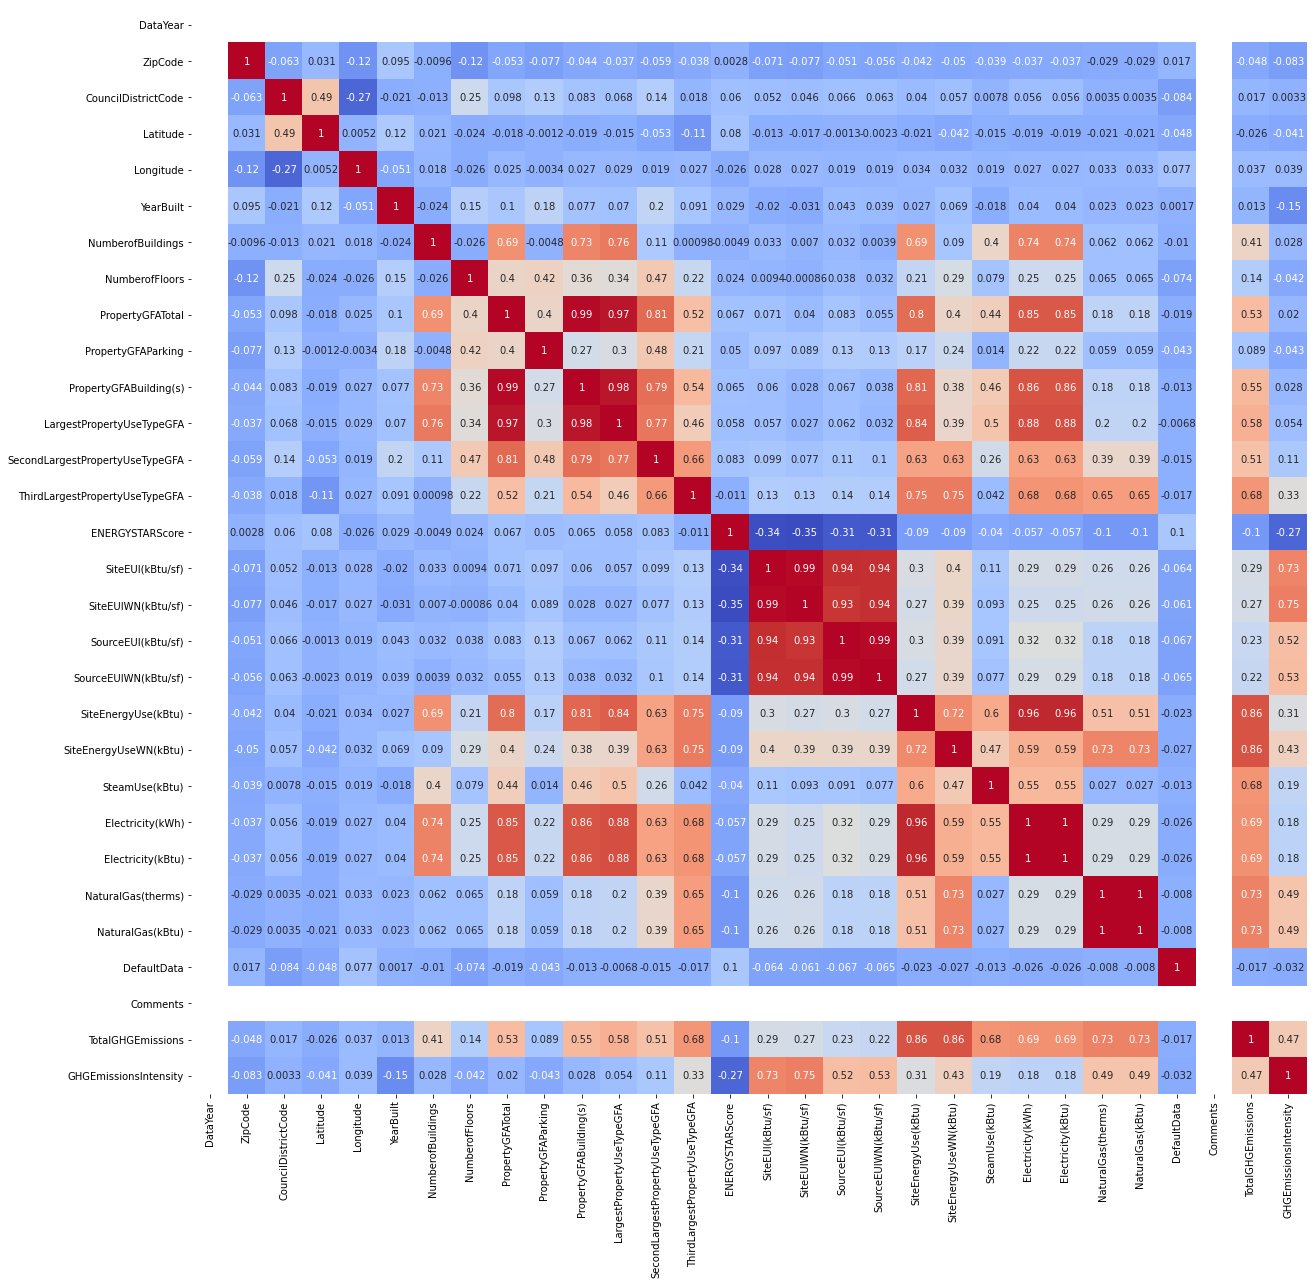

In [9]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot= True, cbar = False, cmap="coolwarm")

### Analyses des meilleurs features

Nous allons analyser les features les plus corrélés pour deux features :
- TotalGHGEmissions
- GHGEmissionsIntensity

In [10]:
realcorr=df_full.corr()

In [11]:
corr_df = realcorr.unstack().reset_index() 

corr_df.columns = ['feature_1','feature_2', 'correlation'] 

corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 

### Pour TotalGHGEmissions

In [12]:
truecorr_df_1 = corr_df[corr_df['feature_1'] == 'TotalGHGEmissions']
truecorr_df_1 =(truecorr_df_1.reset_index(drop=True))
truecorr_df_1

,feature_1,feature_2,correlation
0,TotalGHGEmissions,SiteEnergyUse(kBtu),0.862668
1,TotalGHGEmissions,SiteEnergyUseWN(kBtu),0.859042
2,TotalGHGEmissions,NaturalGas(therms),0.732294
3,TotalGHGEmissions,NaturalGas(kBtu),0.732294
4,TotalGHGEmissions,Electricity(kWh),0.691111
...,...,...,...
206,TotalGHGEmissions,PrimaryPropertyType_Low-Rise Multifamily,-0.110829
207,TotalGHGEmissions,BuildingType_Multifamily LR (1-4),-0.111444
208,TotalGHGEmissions,LargestPropertyUseType_Multifamily Housing,-0.124419
209,TotalGHGEmissions,DataYear,NaN


### Pour GHGEmissionsIntensity

In [13]:
truecorr_df_2 = corr_df[corr_df['feature_1'] == 'GHGEmissionsIntensity']
truecorr_df_2 =(truecorr_df_2.reset_index(drop=True))
truecorr_df_2

,feature_1,feature_2,correlation
0,GHGEmissionsIntensity,SiteEUIWN(kBtu/sf),0.745573
1,GHGEmissionsIntensity,SiteEUI(kBtu/sf),0.730897
2,GHGEmissionsIntensity,SourceEUIWN(kBtu/sf),0.529583
3,GHGEmissionsIntensity,SourceEUI(kBtu/sf),0.524232
4,GHGEmissionsIntensity,NaturalGas(kBtu),0.494864
...,...,...,...
206,GHGEmissionsIntensity,PrimaryPropertyType_Low-Rise Multifamily,-0.174385
207,GHGEmissionsIntensity,LargestPropertyUseType_Multifamily Housing,-0.239415
208,GHGEmissionsIntensity,ENERGYSTARScore,-0.269263
209,GHGEmissionsIntensity,DataYear,NaN


### Observations des features les plus corrélés

In [24]:
truecorr_df_1.head(20)

,feature_1,feature_2,correlation
0,TotalGHGEmissions,SiteEnergyUse(kBtu),0.862668
1,TotalGHGEmissions,SiteEnergyUseWN(kBtu),0.859042
2,TotalGHGEmissions,NaturalGas(therms),0.732294
3,TotalGHGEmissions,NaturalGas(kBtu),0.732294
4,TotalGHGEmissions,Electricity(kWh),0.691111
5,TotalGHGEmissions,Electricity(kBtu),0.691111
6,TotalGHGEmissions,SteamUse(kBtu),0.683254
7,TotalGHGEmissions,ThirdLargestPropertyUseTypeGFA,0.677722
8,TotalGHGEmissions,LargestPropertyUseTypeGFA,0.578487
9,TotalGHGEmissions,PropertyGFABuilding(s),0.545503


In [23]:
truecorr_df_1.tail(20)

,feature_1,feature_2,correlation
191,TotalGHGEmissions,PrimaryPropertyType_Self-Storage Facility,-0.016254
192,TotalGHGEmissions,PrimaryPropertyType_Distribution Center,-0.016313
193,TotalGHGEmissions,LargestPropertyUseType_Self-Storage Facility,-0.016354
194,TotalGHGEmissions,LargestPropertyUseType_Distribution Center,-0.016544
195,TotalGHGEmissions,DefaultData,-0.017384
196,TotalGHGEmissions,LargestPropertyUseType_Worship Facility,-0.021125
197,TotalGHGEmissions,PrimaryPropertyType_Worship Facility,-0.021125
198,TotalGHGEmissions,Latitude,-0.026089
199,TotalGHGEmissions,PrimaryPropertyType_Warehouse,-0.034762
200,TotalGHGEmissions,LargestPropertyUseType_Non-Refrigerated Warehouse,-0.035518


Nous remarquons que certains types de bâtiments sont plus corrélés que d'autres. Nous allons faire une analyse sur ses bâtiments.

# Analyses types de bâtiments

Nous ne prendrons que les Largest et Primary type

In [16]:
one_hot_1 = pd.get_dummies(df[['BuildingType',
                               'PrimaryPropertyType',
                               'LargestPropertyUseType', ]])

totalemissions = pd.DataFrame(df['TotalGHGEmissions'])
batiment = totalemissions.join(one_hot_1)

In [17]:
batiment

,TotalGHGEmissions,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,...,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,249.98,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,295.86,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2089.28,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,286.43,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,505.01,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,20.94,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50223,32.17,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50224,223.54,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Corrélations avec les bâtiments

In [18]:
realcorr=batiment.corr()

In [19]:
corr_df = realcorr.unstack().reset_index() 

corr_df.columns = ['feature_1','feature_2', 'correlation'] 

corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 

In [21]:
bat_corr = corr_df[corr_df['feature_1'] == 'TotalGHGEmissions']
bat_corr =(bat_corr.reset_index(drop=True))
bat_corr.head(10)

,feature_1,feature_2,correlation
0,TotalGHGEmissions,LargestPropertyUseType_Hospital (General Medic...,0.499767
1,TotalGHGEmissions,PrimaryPropertyType_Hospital,0.499767
2,TotalGHGEmissions,BuildingType_Campus,0.273574
3,TotalGHGEmissions,LargestPropertyUseType_College/University,0.129428
4,TotalGHGEmissions,PrimaryPropertyType_University,0.129428
5,TotalGHGEmissions,LargestPropertyUseType_Hotel,0.083354
6,TotalGHGEmissions,PrimaryPropertyType_Hotel,0.082678
7,TotalGHGEmissions,LargestPropertyUseType_Laboratory,0.080433
8,TotalGHGEmissions,BuildingType_NonResidential,0.075619
9,TotalGHGEmissions,PrimaryPropertyType_Laboratory,0.073923


In [22]:
bat_corr.tail(10)

,feature_1,feature_2,correlation
78,TotalGHGEmissions,PrimaryPropertyType_Worship Facility,-0.021125
79,TotalGHGEmissions,LargestPropertyUseType_Worship Facility,-0.021125
80,TotalGHGEmissions,PrimaryPropertyType_Warehouse,-0.034762
81,TotalGHGEmissions,LargestPropertyUseType_Non-Refrigerated Warehouse,-0.035518
82,TotalGHGEmissions,BuildingType_Multifamily MR (5-9),-0.045172
83,TotalGHGEmissions,PrimaryPropertyType_Small- and Mid-Sized Office,-0.045351
84,TotalGHGEmissions,PrimaryPropertyType_Mid-Rise Multifamily,-0.046125
85,TotalGHGEmissions,PrimaryPropertyType_Low-Rise Multifamily,-0.110829
86,TotalGHGEmissions,BuildingType_Multifamily LR (1-4),-0.111444
87,TotalGHGEmissions,LargestPropertyUseType_Multifamily Housing,-0.124419
